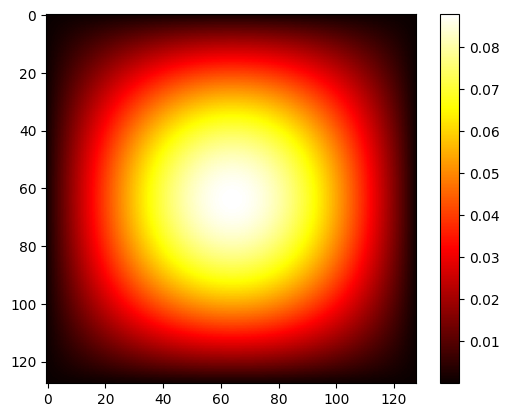

In [4]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# Image size
N = 128

# Diffusion coefficient
alpha = 0.5

# Delta t for time discretization
dt = 0.25

# Heat source
u0 = 1000.0

# Initialization
u = torch.zeros(N, N)
u[N//2, N//2] = u0

# Laplacian kernel
laplacian_kernel = torch.tensor([[[[0, 1, 0], 
                                   [1, -4, 1], 
                                   [0, 1, 0]]]], dtype=torch.float32)

# Time steps
num_steps = 7000

for step in range(num_steps):
    u_with_channel = u.unsqueeze(0).unsqueeze(0)
    laplacian = torch.nn.functional.conv2d(u_with_channel, laplacian_kernel, padding=1).squeeze(0).squeeze(0)
    u += dt * alpha * laplacian

# Plotting
plt.imshow(u, cmap='hot')
plt.colorbar()
plt.show()
